Let's go through a worked example of exploratory data analysis using data visualisation.

In [1]:
### Load Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings

In [2]:
### Settings for the JupyterLab Notebook
# Set matplotlib to output plots without having to use plt.show()
%matplotlib inline 

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

# Use Seaborn Settings for all plots
sns.set()

# Ignore warnings
warnings.simplefilter('ignore')

In [3]:
### Load Libraries
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


When we tackle a dataset, it's usually a good idea to formulate some questions and then run some plots. But lets start by exploring the data.

In [4]:
# How many records do we have
iris['species'].count()

150

In [5]:
# How many records do we have in each category
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

Let's see if we can plot two of these features in a scatter plot.

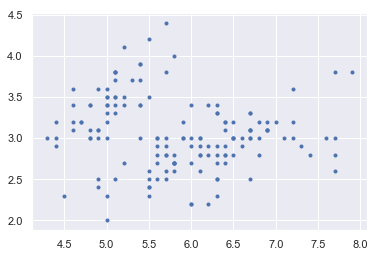

In [6]:
plt.plot(iris['sepal_length'], iris['sepal_width'], marker = '.', linestyle = 'none')

We can use the seaborn library to create a similar plot, but also add histograms which give us an idea of the frequencies for each values.

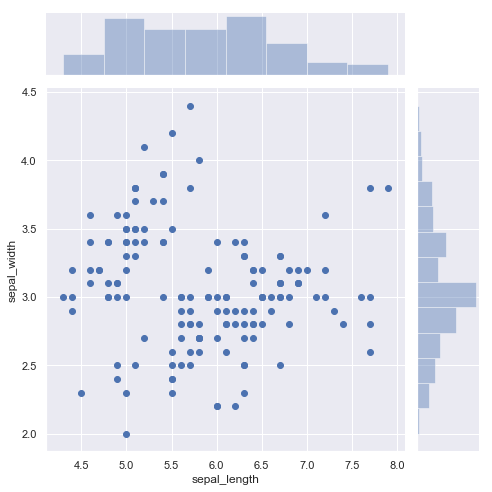

In [7]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = iris, height = 7)

Ok, this is somewhat useful but it would be helpful to see hings by species. We can use a seaborn facetgrid for this.

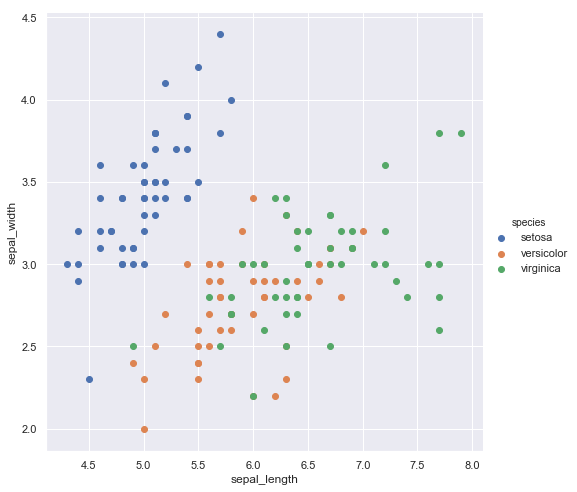

In [8]:
sns.FacetGrid(iris, hue = 'species', height=7) \
    .map(plt.scatter, "sepal_length", 'sepal_width') \
    .add_legend()

We could also look at boxplots to look at individual features.

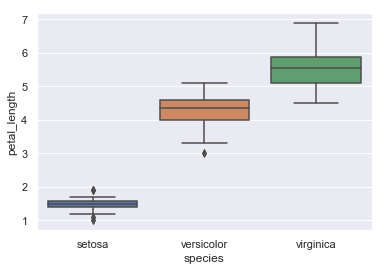

In [9]:
sns.boxplot(x = iris['species'], y = iris['petal_length'])

We can use the subplot feature plot all four features in one go.

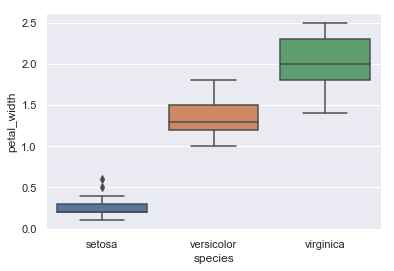

In [10]:
sns.boxplot(x = iris['species'], y = iris['petal_width'])

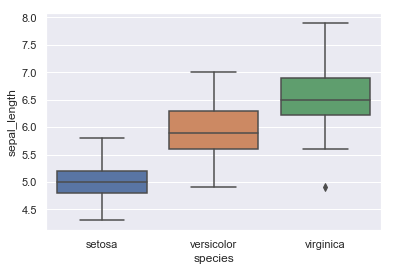

In [11]:
sns.boxplot(x = iris['species'], y = iris['sepal_length'])

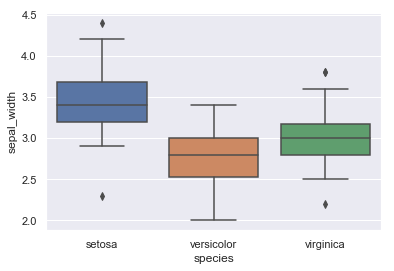

In [12]:
sns.boxplot(x = iris['species'], y = iris['sepal_width'])

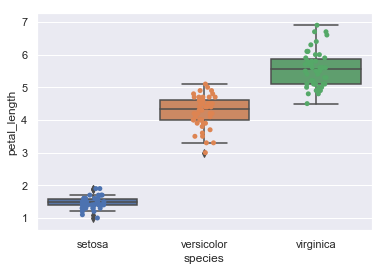

In [13]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

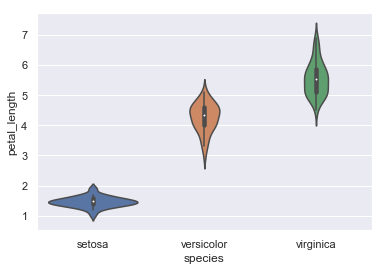

In [14]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="species", y="petal_length", data=iris, size=6)

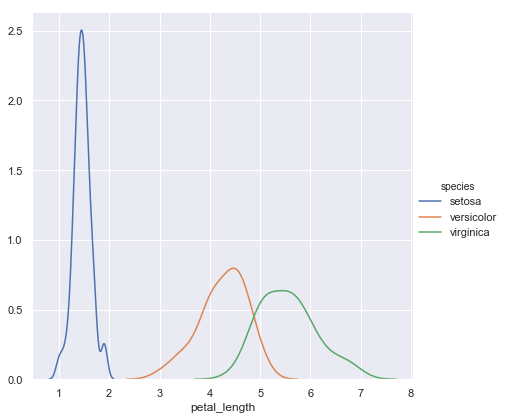

In [15]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="species", height=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

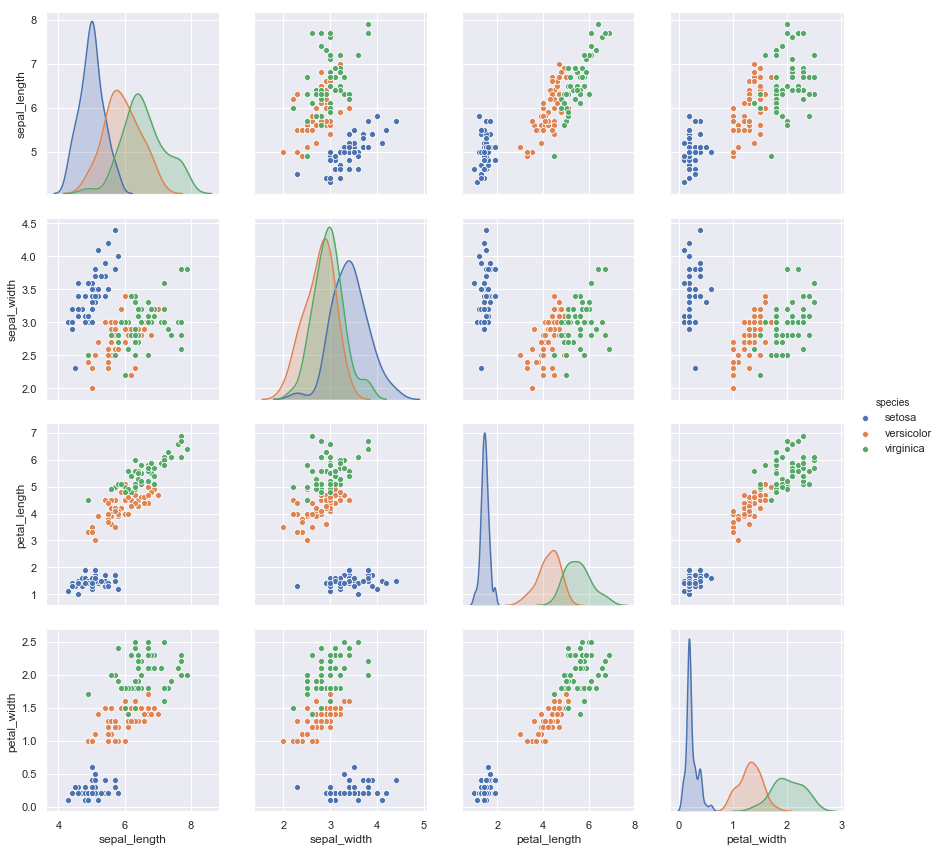

In [18]:
sns.pairplot(iris, hue="species", size=3)

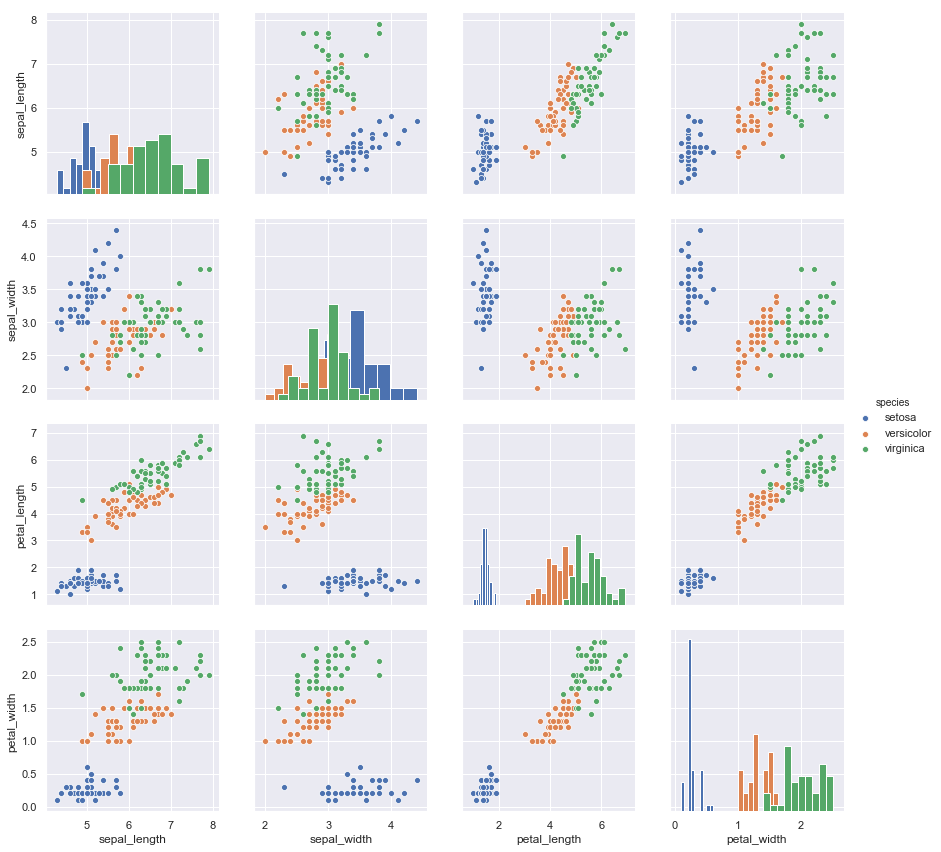

In [20]:
sns.pairplot(iris, hue="species", size=3, diag_kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d41e0b8>,
      dtype=object)

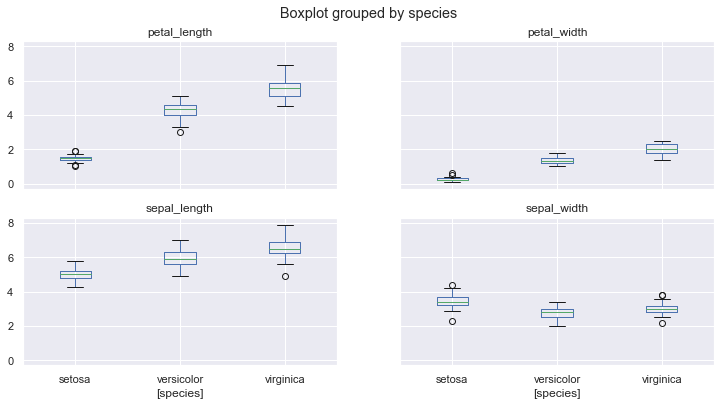

In [21]:
iris.boxplot(by='species', figsize=(12, 6))

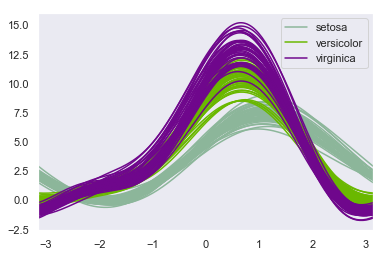

In [22]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'species')

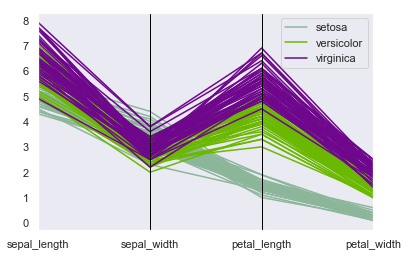

In [24]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'species') 

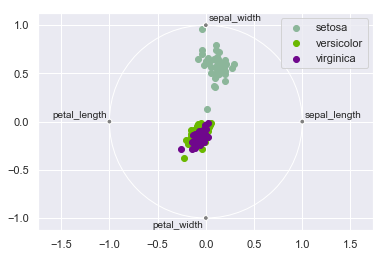

In [25]:
from pandas.tools.plotting import radviz
radviz(iris, 'species')

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris[['sepal_length', 'sepal_width', 'petal_length', 
                                                         'petal_width']],
                                                   iris['species'], random_state=0, train_size=0.75)

In [31]:
print(X_train.head())
print(y_train.head())

     sepal_length  sepal_width  petal_length  petal_width
61            5.9          3.0           4.2          1.5
92            5.8          2.6           4.0          1.2
112           6.8          3.0           5.5          2.1
2             4.7          3.2           1.3          0.2
141           6.9          3.1           5.1          2.3
61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: species, dtype: object


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors is the parameter we pass to KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
y_pred=knn.predict(X_test)

In [34]:
print("Test set score: {:.3f}".format(np.mean(y_pred==y_test)))

Test set score: 0.974


In [35]:
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.974


In [38]:
for neighbors in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)
    print('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train, y_train)),
         'Test set score: {:.3f}'.format(knn.score(X_test, y_test)) )

neighbors: 1 Training set score: 1.000 Test set score: 0.974
neighbors: 2 Training set score: 0.964 Test set score: 0.974
neighbors: 3 Training set score: 0.964 Test set score: 0.974
neighbors: 4 Training set score: 0.973 Test set score: 0.974
neighbors: 5 Training set score: 0.973 Test set score: 0.974
neighbors: 6 Training set score: 0.964 Test set score: 0.974


In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(iris[['petal_length', 'petal_width']],
                                                       iris['species'], random_state=0, train_size=0.75)

In [40]:
print(X_train2.head())

     petal_length  petal_width
61            4.2          1.5
92            4.0          1.2
112           5.5          2.1
2             1.3          0.2
141           5.1          2.3


In [41]:
print(y_train2.head())

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: species, dtype: object


In [43]:
for neighbors in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train2, y_train2)
    print('neighbors: {}'.format(neighbors), "Training set score: {:.3f}".format(knn.score(X_train2, y_train2)),
         'Test set score: {:.3f}'.format(knn.score(X_test2, y_test2)) )

neighbors: 1 Training set score: 0.991 Test set score: 0.974
neighbors: 2 Training set score: 0.973 Test set score: 0.974
neighbors: 3 Training set score: 0.964 Test set score: 0.974
neighbors: 4 Training set score: 0.955 Test set score: 0.947
neighbors: 5 Training set score: 0.955 Test set score: 0.974
neighbors: 6 Training set score: 0.955 Test set score: 0.974
